# linear Regression
    linear regresssion is a regression problem in which we try to predict through the bestfit line 
    
![Linear Regression](linearRegression.png)

[linear regression from scratch](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

[to know more click here](https://towardsdatascience.com/an-intuitive-perspective-to-linear-regression-32bb9885b312)


In [1]:
# imports 

class LinearRegressionUsingGD:
    """ Linear Resgression using Gradient descent.
    
    Parameters:
    -----------
    eta : float 
          Learning rate
    n_iterations : int
          Number of passes over training set
          
    Attributes:
    -----------
    w_ : weight/after fitting the model
    cost_ : total error of model after each iteration
    
    """
    def __init__(self, eta = 0.05 , n_iterations = 1000):
        self.eta = eta 
        self.n_iterations = n_iterations
    
    def fit(self , x , y):
        """ fit the training data
        
        Parameters:
        -----------
        x : array-like , shape = [n_samples , n_features]
            Training samples
        y : array-like , shape = [n_samples , n_features]
            Target values
            
        Returns:
        --------
        self : object
        
        """
        
        self.cost_ = []
        self.w_ = np.zeros((x.shape[1] , 1))
        m = x.shape[0]
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(x , self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T , residuals)
            self.w_ -= (self.eta /m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2*m)
            self.cost_.append(cost)
        return self
    
    def predict(self , x):
        """ Predict the values after the model is trained 
        
        Parameters:
        -----------
        x = array-like , shape = [n_samples , n_features]
            Test samples
            
        Returns:
        Predicted values
        
        """
        return np.dot(x , self.w_)
    

In [7]:
# # Evaluate the performance of model we use RMSE
# # mean square error
# mse = np.sum((y_pred - y_actual)**2)

# # root mean square error
# rmse = np.sqrt(mse/m)

import numpy as np
class PerformanceMetrics:
    """ Defines methods to evaluate the model
    
    Parameters:
    -----------
    y_actual : array-like , shape = (n_samples)
            Observed values from the training samples
    y_predicted : array-like , shape = (n_samples)
            Predicted values from the model
    
    """
    
    def __init__(self , y_actual , y_predicted):
        self.y_actual = y_actual
        self.y_predicted = y_predicted
        
    def compute_rmse(self):
        """ Compute root mean squared error
        
        Returns :
        ----------
        rmse : root mean squared error
        
        """
        
        return np.sqrt(self.sum_of_square_of_residuals())
    
    def compute_r2_score(self):
        """Compute r-squared score
        
        Returns :
        ---------
        r2_score : r-squared score
        
        """
        # sum of square of residuals
        ssr = self.sum_of_square_of_residuals()
        
        # total sum of errors
        sst = np.sum((self.y_actual - np.mean(y_actual))**2)
        
        return (1 - (ssr/sst))
    
    def sum_of_square_of_residuals(self):
        return np.sum((self.y_actual - self.y_predicted)**2)

In [5]:
import matplotlib.pyplot as plt


def scatter_plot(x, y, size=10, x_label='x', y_label='y', color='b'):
    plt.scatter(x, y, s=size, color=color)
    set_labels(x_label, y_label)


def plot(x, y, x_label='x', y_label='y', color='r'):
    plt.plot(x, y, color=color)
    set_labels(x_label, y_label)


def ploty(y, x_label='x', y_label='y'):
    plt.plot(y)
    set_labels(x_label, y_label)


def set_labels(x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

[[2.58109277]
 [2.89114079]]


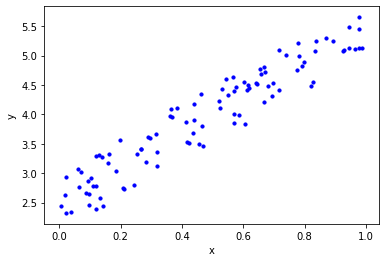

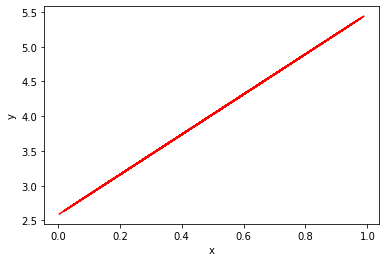

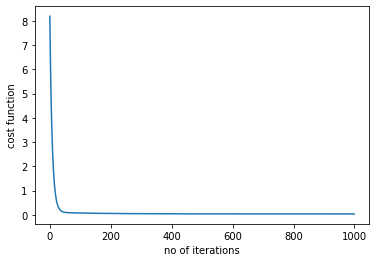

NameError: name 'y_actual' is not defined

In [8]:
import numpy as np
def generate_data_set():
    """ Generates Random Data
    Returns
    -------
    x : array-like, shape = [n_samples, n_features]
            Training samples
    y : array-like, shape = [n_samples, n_target_values]
            Target values
    """
    np.random.seed(0)
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    return x, y


if __name__ == "__main__":
    # initializing the model
    linear_regression_model = LinearRegressionUsingGD()

    # generate the data set
    x, y = generate_data_set()

    # transform the feature vectors to include the bias term
    # adding 1 to all the instances of the training set.
    m = x.shape[0]
    x_train = np.c_[np.ones((m, 1)), x]

    # fit/train the model
    linear_regression_model.fit(x_train, y)

    # predict values
    predicted_values = linear_regression_model.predict(x_train)

    # model parameters
    print(linear_regression_model.w_)
    intercept, coeffs = linear_regression_model.w_

    # cost_function
    cost_function = linear_regression_model.cost_

    # plotting
    scatter_plot(x, y)
    plot(x, predicted_values)
    ploty(cost_function, 'no of iterations', 'cost function')

    # computing metrics
    metrics = PerformanceMetrics(y, predicted_values)
    rmse = metrics.compute_rmse()
    r2_score = metrics.compute_r2_score()

    print('The coefficient is {}'.format(coeffs))
    print('The intercept is {}'.format(intercept))
    print('Root mean squared error of the model is {}.'.format(rmse))
    print('R-squared score is {}.'.format(r2_score))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionUsingGD:
    def __init__(self, n_iterations = 1000, eta = 0.05):
        self.eta = eta
        self.n_iterations = n_iterations
        
    def fit(self, x , y):
        self.cost_ = []
        self.w_ = np.zeros(x.shape[1] , 1)
        m = x.shape[0]
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(x , self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T , residuals)
            self.w_ -= (self.eta /m) * gradient_vector
            cost = np.sum((residual ** 2) / 2 *m)
            self.cost_.append(cost)
        return self
    
    def predict(self ,x):
        return np.dot(x , self.w_)
    
class PerformanceMetrics:
    def __init__(self , y_actual, y_predictions):
        self.y_actual = y_actual
        self.y_predictions = y_predictions
    
    def sum_of_square_of_residuals(self):
        return np.sum((self.y_actual - self.y_predictions)**2)
    
    def compute_rmse(self):
        return np.sqrt(self.sum_of_square_of_residuals())
    
    def compute_r2_score(self):
        ssr = self.sum_of_square_of_residuals()
        sst = np.sum((self.y_actual - np.mean(self.y_actual))**2)
        
        return (1 + (ssr/sst))
    
def scatter_plot(x, y, size=10, x_label='x', y_label='y', color='b'):
    plt.scatter(x, y, s=size, color=color)
    set_labels(x_label, y_label)


def plot(x, y, x_label='x', y_label='y', color='r'):
    plt.plot(x, y, color=color)
    set_labels(x_label, y_label)


def ploty(y, x_label='x', y_label='y'):
    plt.plot(y)
    set_labels(x_label, y_label)


def set_labels(x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
        
def generateSampleData():
    np.random.seed(0)
    x = np.random.rand(100 , 1)
    y = 2 + 3*x + np.random.rand(100 , 1)
    
    return x , y

if __name__ == '__main__':
    LModel = LinearRegressionUsingGD()
    
    x , y = generateSampleData()
    m = x.shape[0]
    x_train = np.c_[np.ones((m, 1)), x]
    
    LModel.fit(x_train , y)
    
    predict = LModel.predict(x_train)
    
    print(LModel.w_)
    intercept , coeff = LModel.w_
    cost_function = LModel.cost_
    
    scatter_plot(x, y)
    plot(x, predicted_values)
    ploty(cost_function, 'no of iterations', 'cost function')
    
    metrics = PerformanceMetrics(y, predicted_values)
    rmse = metrics.compute_rmse()
    r2_score = metrics.compute_r2_score()

    print('The coefficient is {}'.format(coeffs))
    print('The intercept is {}'.format(intercept))
    print('Root mean squared error of the model is {}.'.format(rmse))
    print('R-squared score is {}.'.format(r2_score))

TypeError: data type not understood

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


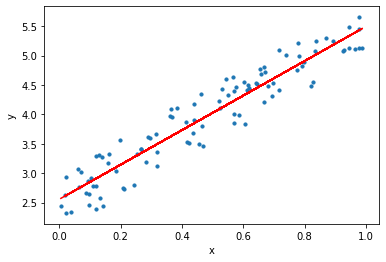

In [9]:
# Linear Regression using scikit-learn

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score


# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# Model initialization
regression_model = LinearRegression()
# Fit the data (Train the model)
regression_model.fit(x , y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y , y_predicted)
r2 = r2_score(y , y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

mse 0.07623324582875007
r2_score 0.9038655568672764
slope [[2.93655106]]
intercept [2.55808002]


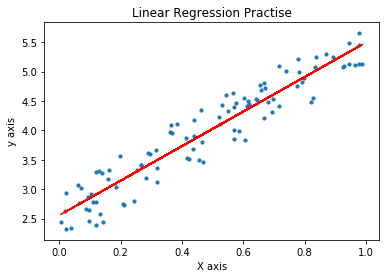

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# generate sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3*X + np.random.rand(100 , 1)

linearModel = LinearRegression()
linearModel.fit(X , y)
predictions = linearModel.predict(X)

# mse 
mse = mean_squared_error(y , predictions)

# r squared score
r2 = r2_score(y , predictions)

print('mse' , mse)
print('r2_score' , r2)
print('slope' , linearModel.coef_)
print('intercept' , linearModel.intercept_)

plt.scatter(X , y , s = 10)
plt.plot(X , predictions , 'r')
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('Linear Regression Practise')
plt.show()

In [10]:
# # sum of square of residuals
# ssr = np.sum((y_pred - y_actual)**2)

# # total sum of squares
# sst = np.sum((y_acutal - np.mean(y_acutal))**2)

# # R2 score
# r2_score = 1-(ssr/sst)

In [2]:
#### Method 1:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0 ,10.0)

#Read data
data = pd.read_csv('areaprice.csv')
print(data.shape)
data.head()

(11, 2)


,area,price
0,2800,50000
1,3000,54000
2,3200,53000
3,3700,60000
4,4000,63000


In [5]:
X = data['area'].values
Y = data['price'].values

In [6]:
#Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# total number of values in X
n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer = numer + ((X[i] - mean_x)* (Y[i] - mean_y))
    denom =denom + ((X[i] - mean_x)** 2)

b1 = numer/denom
b0 = mean_y -(b1 * mean_x)

# printing coefficients
print(b1 ,b0)

10.499130866650113 20957.784951576847


5100 2100


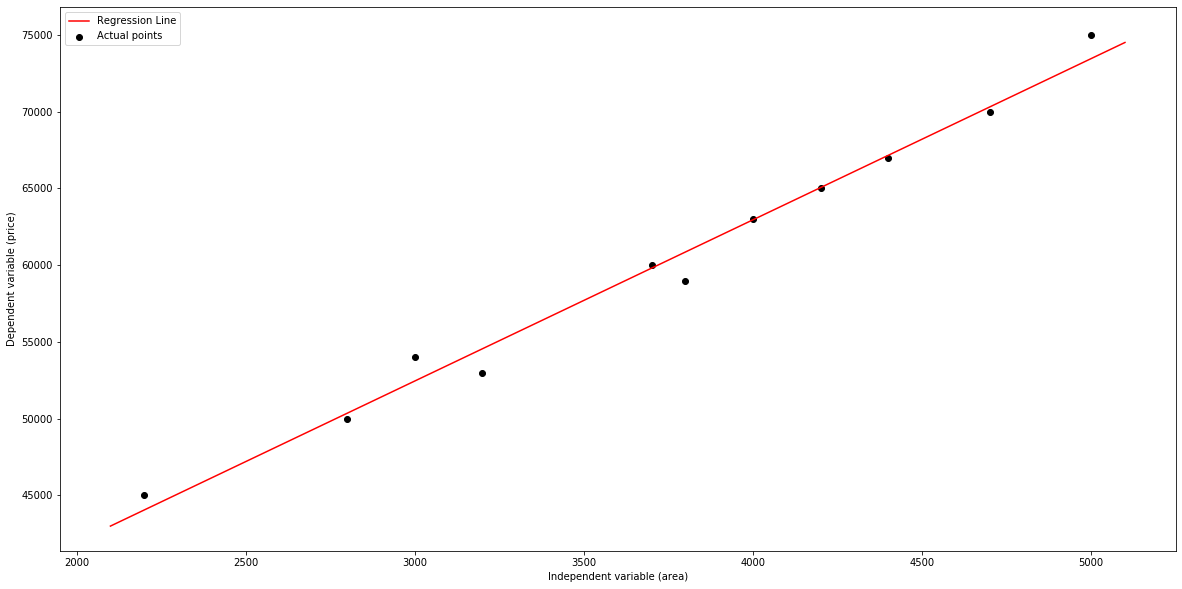

In [8]:
# Plotting values and Regression line
max_x = np.max(X) +100
min_x = np.min(X) -100

print(max_x , min_x)
#calculating line values x and y
x = np.linspace(max_x , min_x , 1000)
y = b0 +b1 * x

#plotting line 
plt.plot(x , y ,color='red' , label = 'Regression Line')

# Scatter plot
plt.scatter(X , Y , color= 'black' , label = 'Actual points')
plt.xlabel('Independent variable (area)')
plt.ylabel('Dependent variable (price)')
plt.legend()
plt.show()

In [35]:
# Method 2 :
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [12]:
data = pd.read_csv('areaprice.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    11 non-null     int64
 1   price   11 non-null     int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [29]:
lModel = LinearRegression()
X = data.drop('price', axis = 1)
y = data.price

In [30]:
X_train , X_test , y_train , y_test= train_test_split(X , y ,test_size = 0.3)

In [31]:
lModel.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
prediction=lModel.predict(X_test)
print('Train data =',lModel.score(X_train , y_train)*100 , ' %')
print('Predicted data =', lModel.score(X_test , y_test)*100,' %')

Train data = 99.10842552208197  %
Predicted data = 90.24220239676124  %


In [38]:
print(lModel.score(X, y)*100)

98.53634055293017


In [25]:
## Method 3:
# sales of vehicle as a function of GDP (for India)
import collections
stepSize = 0.01
def read_data() :
    data = open("vehicle_sale_data" , "r")
    gdp_sale = collections.OrderedDict()
    for line in data.readlines()[1:] :
        record = line.split(",")
        gdp_sale[float(record[1])] = float(record[2].replace('\n', ""))
    return gdp_sale

def sale_for_data(constant, slope, data):
    return constant + slope * data   # y = c + ax format

def step_cost_function_for(gdp_sale, constant, slope) :
    global stepSize
    diff_sum_constant = 0 # diff of sum for constant 'c' in "c + ax" equation
    diff_sum_slope = 0  # diff of sum for 'a' in "c + ax" equation
    gdp_for_years = list(gdp_sale.keys())
    
    for year_gdp in gdp_for_years: # for each year's gdp in the sample data
        # get the sale for given 'c' and 'a'by giving the GDP for this sample record
        trg_data_sale = sale_for_data(constant, slope, year_gdp) # calculated sale for current 'c' and 'a'
        a_year_sale = gdp_sale.get(year_gdp) # real sale for this record
        diff_sum_slope = diff_sum_slope + ((trg_data_sale - a_year_sale) * year_gdp) # slope's (h(y) - y) * x
        diff_sum_constant = diff_sum_constant + (trg_data_sale - a_year_sale) # consant's (h(y) - y)
        
    step_for_constant = (stepSize / len(gdp_sale)) * diff_sum_constant # distance to be moved by c
    step_for_slope = (stepSize / len(gdp_sale)) * diff_sum_slope # distance to be moved by a
    new_constant = constant - step_for_constant # new c
    new_slope = slope - step_for_slope # new a
    return new_constant, new_slope

def get_weights(gdp_sale) :
    constant = 1
    slope = 1
    accepted_diff = 0.01
    while 1 == 1:  # continue till we reach local minimum
        new_constant, new_slope = step_cost_function_for(gdp_sale, constant, slope)
        # if the diff is too less then lets break
        if (abs(constant - new_constant) <= accepted_diff) and (abs(slope - new_slope) <= accepted_diff):
            print ("done. Diff is less than " + str(accepted_diff))
            return new_constant, new_slope
        else:
            constant = new_constant
            slope = new_slope
            print("new values for constant and slope are " + str(new_constant) + ", " + \
                  str(new_slope))
                
def main() :
    contant, slope = get_weights(read_data())
    print(("constant : {} , slope: {}").format(contant , slope) )
    
if __name__ == '__main__':
    main()

new values for constant and slope are 1.1942166666666667, 2.296241
new values for constant and slope are 1.3004423682833335, 3.0007543440089446
new values for constant and slope are 1.3588378687307063, 3.383616460023943
new values for constant and slope are 1.3912337507054766, 3.591635456833548
new values for constant and slope are 1.4094966794556214, 3.7046132666748948
new values for constant and slope are 1.4200771353082968, 3.765928613252169
new values for constant and slope are 1.4264814695121573, 3.799161297422246
new values for constant and slope are 1.4306156640231555, 3.817128824195407
done. Diff is less than 0.01
constant : 1.4335157722700855 , slope: 3.826798531237839


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('iris.csv')

In [6]:
X = dataset.drop('variety' ,axis = 1) 
y = dataset.variety

In [4]:
encoder = LabelEncoder()

In [5]:
dataset.variety = encoder.fit_transform(dataset.variety)

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 0)

In [10]:
linearModel = LinearRegression()
linearModel.fit(X_train , y_train)
predictions = linearModel.predict(X_test)

print('Model training' , linearModel.score(X_train , y_train))
print('Model prediction',linearModel.score(X_test, y_test))

Model training 0.9340217779843487
Model prediction 0.9055032992676105
